In [1]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#loading the file as per instructions
data = pd.read_csv('train.csv')

In [61]:
data.head()

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence,music_genre
0,MSC_83537.0,Estrellitas y Duendes,49.178,0.970522,0.580508,214625.776,0.192107,0.000000,Scale E,0.147134,-14.140,NaN,Major,0.046404,143.78799999999998,Band,0.598965,Jazz
1,MSC_22044.0,Al Norte,59.827,1.009380,0.687542,216232.195,0.265942,0.000031,Scale A,0.174655,-13.716,Male,?,0.039949,?,Band,0.357194,Jazz
2,MSC_62017.0,Yeah! (feat. Lil Jon & Ludacris),89.023,0.020041,0.967948,273314.723,0.857411,0.000000,Scale D,0.042030,-4.995,Female,Major,0.119917,105.01799999999999,Band,0.635525,Rap
3,MSC_76365.0,Can’t You See,55.762,0.010284,0.616287,189189.605,0.970513,0.000220,Scale D,0.124637,-4.262,Both,Major,0.167493,?,Duet,0.983750,Rock
4,MSC_71493.0,"Sonata III (G Moll), BWV 1029: Adagio",45.095,0.858769,0.280645,410136.987,0.114732,0.002753,Scale F Sharp,0.134782,-26.922,Female,Minor,0.039139,112.18299999999999,Band,0.074412,Classical


In [4]:
df = data.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15681 entries, 0 to 15680
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   instance_id        15681 non-null  object 
 1   track_name         15681 non-null  object 
 2   popularity         15039 non-null  float64
 3   acousticness       15681 non-null  float64
 4   danceability       15125 non-null  float64
 5   duration_ms        15587 non-null  float64
 6   energy             15587 non-null  float64
 7   instrumentalness   15586 non-null  float64
 8   key                15681 non-null  object 
 9   liveness           15681 non-null  float64
 10  loudness           15645 non-null  float64
 11  voice_gender       14916 non-null  object 
 12  mode               15646 non-null  object 
 13  speechiness        15655 non-null  float64
 14  tempo              15681 non-null  object 
 15  musician_category  14321 non-null  object 
 16  valence            150

In [6]:
#Let's check the null value
df.isna().sum()

instance_id             0
track_name              0
popularity            642
acousticness            0
danceability          556
duration_ms            94
energy                 94
instrumentalness       95
key                     0
liveness                0
loudness               36
voice_gender          765
mode                   35
speechiness            26
tempo                   0
musician_category    1360
valence               677
music_genre             0
dtype: int64

In [7]:
# fill all the Nan value with mean wherever wee can
df = df.fillna(df.mean())

df.isna().sum()

instance_id             0
track_name              0
popularity              0
acousticness            0
danceability            0
duration_ms             0
energy                  0
instrumentalness        0
key                     0
liveness                0
loudness                0
voice_gender          765
mode                   35
speechiness             0
tempo                   0
musician_category    1360
valence                 0
music_genre             0
dtype: int64

In [8]:
#As mode column has '?' so we will solve it late and we will first fill other 2 columns.
df['voice_gender'].fillna(df['voice_gender'].mode()[0], inplace=True)
df['musician_category'].fillna(df['musician_category'].mode()[0], inplace=True)

In [9]:
#as we can see mode and temo has the ? so, we will replace it by null
df['mode'] = df['mode'].apply(lambda x:np.nan if x == '?' else x)
df['tempo'] = df['tempo'].apply(lambda x:np.nan if x == '?' else x)

In [10]:
#let's check again for null values
df.isna().sum()

instance_id             0
track_name              0
popularity              0
acousticness            0
danceability            0
duration_ms             0
energy                  0
instrumentalness        0
key                     0
liveness                0
loudness                0
voice_gender            0
mode                 1114
speechiness             0
tempo                1476
musician_category       0
valence                 0
music_genre             0
dtype: int64

In [11]:
df.head()

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence,music_genre
0,MSC_83537.0,Estrellitas y Duendes,49.178,0.970522,0.580508,214625.776,0.192107,0.000000,Scale E,0.147134,-14.140,Female,Major,0.046404,143.78799999999998,Band,0.598965,Jazz
1,MSC_22044.0,Al Norte,59.827,1.009380,0.687542,216232.195,0.265942,0.000031,Scale A,0.174655,-13.716,Male,NaN,0.039949,NaN,Band,0.357194,Jazz
2,MSC_62017.0,Yeah! (feat. Lil Jon & Ludacris),89.023,0.020041,0.967948,273314.723,0.857411,0.000000,Scale D,0.042030,-4.995,Female,Major,0.119917,105.01799999999999,Band,0.635525,Rap
3,MSC_76365.0,Can’t You See,55.762,0.010284,0.616287,189189.605,0.970513,0.000220,Scale D,0.124637,-4.262,Both,Major,0.167493,NaN,Duet,0.983750,Rock
4,MSC_71493.0,"Sonata III (G Moll), BWV 1029: Adagio",45.095,0.858769,0.280645,410136.987,0.114732,0.002753,Scale F Sharp,0.134782,-26.922,Female,Minor,0.039139,112.18299999999999,Band,0.074412,Classical


In [12]:
#from above we found that 'tempo' is object type but it is look like float. So we will have to change its data type
df['tempo'] = df['tempo'].astype('float64')

In [13]:
df['tempo']

0        143.788
1            NaN
2        105.018
3            NaN
4        112.183
          ...   
15676    123.516
15677    129.445
15678    123.170
15679    116.077
15680     94.200
Name: tempo, Length: 15681, dtype: float64

In [14]:
#Now let's remove the null values
df = df.fillna(df.mean())

df['mode'].fillna(df['mode'].mode()[0], inplace=True)

In [15]:
#Let's plot the pairplot
#sns.pairplot(df, hue='music_genre')

In [16]:
#let's check the no. of unique values in data
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [17]:
print_unique_col_values(df)

instance_id: ['MSC_83537.0' 'MSC_22044.0' 'MSC_62017.0' ... 'MSC_32827.0' 'MSC_89976.0'
 'MSC_43297.0']
track_name: ['Estrellitas y Duendes' 'Al Norte' 'Yeah! (feat. Lil Jon & Ludacris)' ...
 "Moment's Notice" 'Such Small Scenes' 'Dogs of War']
key: ['Scale E' 'Scale A' 'Scale D' 'Scale F Sharp' 'Scale G Sharp'
 'Scale C Sharp' 'Scale A Sharp' 'Scale F' 'Scale G' 'Scale B' 'Scale C'
 'Scale D Sharp']
voice_gender: ['Female' 'Male' 'Both']
mode: ['Major' 'Minor']
musician_category: ['Band' 'Duet' 'Solo']
music_genre: ['Jazz' 'Rap' 'Rock' 'Classical' 'Electronic' 'Country' 'Hip-Hop']


We don't need to use the instance_id. Apart from that if a column has many categories then we will use label encoder else dummy encoding.

In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [19]:
df['track_name'] = le.fit_transform(df['track_name'])
df['key'] = le.fit_transform(df['key'])

In [20]:
df['music_genre'] = le.fit_transform(df['music_genre'])

In [21]:
#for other categorical features, we'll use dummy encoding becuase of less unique values
dummy1 = pd.get_dummies(df['voice_gender'],drop_first=True)
dummy2 = pd.get_dummies(df['mode'],drop_first=True)
dummy3 = pd.get_dummies(df['musician_category'],drop_first=True)

In [22]:
#Let's concate these dummies to main dataframe
df1 = pd.concat([df,dummy1,dummy2,dummy3],axis=1)

In [23]:
#time to drop the original feature of dummies including id
new_data = df1.drop(['instance_id','voice_gender','mode','musician_category'],axis=1)

In [24]:
new_data

,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,music_genre,Female,Male,Minor,Duet,Solo
0,3659,49.178,0.970522,0.580508,214625.776,0.192107,0.000000,7,0.147134,-14.140,0.046404,143.788000,0.598965,4,1,0,0,0,0
1,540,59.827,1.009380,0.687542,216232.195,0.265942,0.000031,0,0.174655,-13.716,0.039949,115.447641,0.357194,4,0,1,0,0,0
2,14449,89.023,0.020041,0.967948,273314.723,0.857411,0.000000,5,0.042030,-4.995,0.119917,105.018000,0.635525,5,1,0,0,0,0
3,2022,55.762,0.010284,0.616287,189189.605,0.970513,0.000220,5,0.124637,-4.262,0.167493,115.447641,0.983750,6,0,0,0,1,0
4,11036,45.095,0.858769,0.280645,410136.987,0.114732,0.002753,9,0.134782,-26.922,0.039139,112.183000,0.074412,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15676,5738,0.000,0.866988,0.387476,-1.000,0.196799,0.028725,2,0.248399,-16.331,0.045251,123.516000,0.624518,0,1,0,0,0,0
15677,8774,40.514,0.883333,0.459917,378128.464,0.349263,0.000519,8,0.681492,-25.087,0.448377,129.445000,0.609022,4,0,0,0,1,0
15678,7777,35.082,0.905281,0.566619,581799.061,0.543673,0.209238,6,0.416611,-10.246,0.040625,123.170000,0.869294,4,1,0,0,0,0
15679,11584,59.693,0.113408,0.644554,151226.592,0.912201,0.000089,8,0.166336,-7.257,0.060308,116.077000,0.402700,6,0,0,1,1,0


In [25]:
#As we can see above duration_ms has -1 value which is not posible, so let's change it with 0
new_data['duration_ms'] = new_data['duration_ms'].apply(lambda x:0 if x == -1 else x)

In [26]:
new_data.columns

Index(['track_name', 'popularity', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'speechiness', 'tempo', 'valence', 'music_genre', 'Female',
       'Male', 'Minor', 'Duet', 'Solo'],
      dtype='object')

In [27]:
new_data = new_data[['track_name', 'popularity', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'speechiness', 'tempo', 'valence', 'Female',
       'Male', 'Minor', 'Duet', 'Solo', 'music_genre']]

## Train Test Split

In [28]:
X = new_data.drop(['music_genre'], axis=1)
y = new_data['music_genre']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

## Scaling the data

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
scaler = MinMaxScaler()

In [33]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model creation and prediction

In [34]:
#Let's start with logistic regression
from sklearn.linear_model import LogisticRegression

In [35]:
lr = LogisticRegression()

lr.fit(X_train,y_train)

C:\Users\subzz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
prediction_lr = lr.predict(X_test)

In [37]:
#Lets' check for classification report
from sklearn.metrics import confusion_matrix, classification_report

In [38]:
print(classification_report(y_test,prediction_lr))
print('\n')
print(confusion_matrix(y_test,prediction_lr))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1317
           1       0.62      0.16      0.25       225
           2       0.56      0.28      0.37       203
           3       0.00      0.00      0.00       151
           4       0.66      0.66      0.66       941
           5       0.71      0.78      0.74      1058
           6       0.70      0.84      0.76      1280

    accuracy                           0.73      5175
   macro avg       0.59      0.52      0.52      5175
weighted avg       0.71      0.73      0.71      5175



[[1181    7   13    0   83    4   29]
 [   6   35    2    0   74    8  100]
 [   8    3   56    0   92   23   21]
 [   0    0    0    0    5  127   19]
 [ 155   10   24    1  620   46   85]
 [   0    0    2    0   18  827  211]
 [  16    1    3    0   52  129 1079]]


In [39]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

In [40]:
rfc = RandomForestClassifier(n_estimators=500)

rfc.fit(X_train, y_train)

prediction_rfc = rfc.predict(X_test)

In [41]:
print(classification_report(y_test,prediction_rfc))
print('\n')
print(confusion_matrix(y_test,prediction_rfc))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1317
           1       0.77      0.36      0.49       225
           2       0.70      0.33      0.44       203
           3       0.00      0.00      0.00       151
           4       0.71      0.75      0.73       941
           5       0.74      0.79      0.77      1058
           6       0.73      0.87      0.80      1280

    accuracy                           0.77      5175
   macro avg       0.65      0.57      0.59      5175
weighted avg       0.75      0.77      0.76      5175



[[1189    4   13    0   92    1   18]
 [   3   82    1    0   50    6   83]
 [   9    5   66    0   97    9   17]
 [   0    1    1    0    2  136   11]
 [  90   12   11    0  710   31   87]
 [   1    1    2    8   12  840  194]
 [   7    2    0    1   37  115 1118]]


From above it's look like our taget dataset is inbalanced, So we have to balance the data while using SMOTE

In [42]:
!pip install imbalanced-learn

In [43]:
from imblearn.over_sampling import SMOTE
from collections import Counter

Class=4, n=3990 (14.286%)
Class=5, n=3990 (14.286%)
Class=6, n=3990 (14.286%)
Class=0, n=3990 (14.286%)
Class=2, n=3990 (14.286%)
Class=1, n=3990 (14.286%)
Class=3, n=3990 (14.286%)


<BarContainer object of 7 artists>

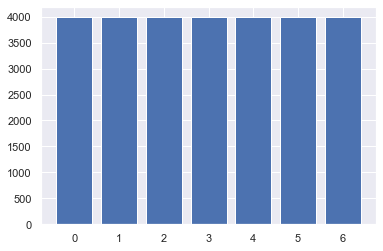

In [44]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())

Now we will split the new X, y again and then predict

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

In [46]:
rfc.fit(X_train, y_train)

prediction_rfc = rfc.predict(X_test)

In [47]:
print(classification_report(y_test,prediction_rfc))
print('\n')
print(confusion_matrix(y_test,prediction_rfc))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1316
           1       0.86      0.89      0.88      1317
           2       0.87      0.90      0.89      1317
           3       0.83      0.91      0.87      1317
           4       0.81      0.71      0.76      1317
           5       0.77      0.69      0.73      1316
           6       0.76      0.81      0.78      1317

    accuracy                           0.83      9217
   macro avg       0.83      0.83      0.83      9217
weighted avg       0.83      0.83      0.83      9217



[[1189    7   21    0   85    0   14]
 [   2 1175    5   10   43   11   71]
 [   3   26 1189   22   42   10   25]
 [   0    2    1 1193    3  112    6]
 [  97   65  131    9  940   21   54]
 [   0   14    9  197    8  914  174]
 [   3   70    9   10   44  115 1066]]


It seems like our oversampling method worked. So, Now we will try some more models model too.

In [48]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

y_test_pred = clf.predict(X_test)

In [49]:
print(classification_report(y_test,y_test_pred))
print('\n')
print(confusion_matrix(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      1316
           1       0.86      0.87      0.87      1317
           2       0.88      0.89      0.88      1317
           3       0.80      0.88      0.84      1317
           4       0.78      0.72      0.75      1317
           5       0.75      0.67      0.71      1316
           6       0.75      0.79      0.77      1317

    accuracy                           0.82      9217
   macro avg       0.82      0.82      0.82      9217
weighted avg       0.82      0.82      0.82      9217



[[1195    6   12    0   82    2   19]
 [   3 1151    6   12   48   14   83]
 [  10   21 1174   19   62   11   20]
 [   0    4    6 1160    5  132   10]
 [  89   55  134    7  950   19   63]
 [   0   17    3  235   18  882  161]
 [   5   78    4   11   55  119 1045]]


In [50]:
!pip install catboost

In [51]:
from catboost import CatBoostClassifier

In [52]:
cat = CatBoostClassifier(iterations=100, depth=10, learning_rate=0.1)

cat.fit(X_train,y_train)

cat_predict = cat.predict(X_test)

0:	learn: 1.7461942	total: 416ms	remaining: 41.2s
1:	learn: 1.6020624	total: 714ms	remaining: 35s
2:	learn: 1.4815768	total: 999ms	remaining: 32.3s
3:	learn: 1.3891177	total: 1.29s	remaining: 31s
4:	learn: 1.3134133	total: 1.57s	remaining: 29.8s
5:	learn: 1.2540872	total: 1.86s	remaining: 29.1s
6:	learn: 1.1949486	total: 2.14s	remaining: 28.5s
7:	learn: 1.1451748	total: 2.43s	remaining: 28s
8:	learn: 1.0982697	total: 2.72s	remaining: 27.5s
9:	learn: 1.0584179	total: 3.02s	remaining: 27.2s
10:	learn: 1.0232391	total: 3.35s	remaining: 27.1s
11:	learn: 0.9904193	total: 3.68s	remaining: 27s
12:	learn: 0.9624932	total: 4.02s	remaining: 26.9s
13:	learn: 0.9366220	total: 4.33s	remaining: 26.6s
14:	learn: 0.9135788	total: 4.65s	remaining: 26.3s
15:	learn: 0.8934174	total: 4.97s	remaining: 26.1s
16:	learn: 0.8697471	total: 5.29s	remaining: 25.8s
17:	learn: 0.8503674	total: 5.62s	remaining: 25.6s
18:	learn: 0.8321803	total: 5.93s	remaining: 25.3s
19:	learn: 0.8137320	total: 6.28s	remaining: 25.1

In [53]:
print(classification_report(y_test,cat_predict))
print('\n')
print(confusion_matrix(y_test,cat_predict))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1316
           1       0.84      0.84      0.84      1317
           2       0.84      0.86      0.85      1317
           3       0.77      0.85      0.81      1317
           4       0.76      0.69      0.72      1317
           5       0.73      0.65      0.68      1316
           6       0.74      0.80      0.77      1317

    accuracy                           0.80      9217
   macro avg       0.80      0.80      0.80      9217
weighted avg       0.80      0.80      0.80      9217



[[1179   12   28    0   84    0   13]
 [   2 1108    5   14   61   21  106]
 [   5   36 1139   28   73   11   25]
 [   0    6   11 1117    5  163   15]
 [ 108   64  154   11  906   17   57]
 [   0   21   13  257   13  852  160]
 [   4   78    7   15   45  109 1059]]


In [54]:
import xgboost as xgb

In [55]:
xgb_cls = xgb.XGBClassifier(colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 150)

In [56]:
xgb_cls.fit(X_train,y_train)

xgb_pred = xgb_cls.predict(X_test)

C:\Users\subzz\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:01:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [57]:
print(classification_report(y_test,xgb_pred))
print('\n')
print(confusion_matrix(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1316
           1       0.82      0.82      0.82      1317
           2       0.82      0.83      0.82      1317
           3       0.74      0.79      0.77      1317
           4       0.73      0.66      0.69      1317
           5       0.68      0.64      0.66      1316
           6       0.73      0.80      0.76      1317

    accuracy                           0.78      9217
   macro avg       0.78      0.78      0.77      9217
weighted avg       0.78      0.78      0.77      9217



[[1175    9   32    0   84    1   15]
 [   2 1076   11   29   69   14  116]
 [   7   44 1095   32   99   11   29]
 [   0   11   12 1040    6  232   16]
 [ 104   79  177   10  865   20   62]
 [   0   21    8  271   12  845  159]
 [   5   79    7   15   47  111 1053]]


After Comparing all these models. We finalize our model which is random forest

#### Dump the model, so we can use it later for test data

In [58]:
import pickle

In [59]:
file_name = 'music_genre.sav'
pickle.dump(rfc, open(file_name, 'wb'))